In [1]:
%%capture pip
!pip install xgboost pandas sklearn

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd

## Generate Random Data

We are going to use `np.random.normal()` to generate `size` random data rows. Only `feature_1` is truely related to the `target`. All other features are random generated columns.

In [21]:
random_data_np = np.random.normal(size=(1000,50))
random_data_df = pd.DataFrame(random_data_np, columns=[ "target"] + [ "feature_{}".format(i) for i in range(random_data_np.shape[1])[1:] ])
random_data_df.feature_1 = random_data_df.feature_1 * 0.5 + random_data_df.target

In [22]:
random_data_df

target  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    0.313078   0.528599  -1.314429   2.321291   0.966177  -0.036568   
1   -0.041730  -0.866087   0.354758  -1.054855   0.882663   1.036473   
2    0.908989   1.644376  -0.100027  -0.415398  -2.023648   0.784861   
3   -0.839663  -0.437411  -1.674660   0.067792   1.343179   1.067098   
4    1.650348   1.903904   1.391099  -0.197240   0.596216   0.396398   
..        ...        ...        ...        ...        ...        ...   
995  1.134902   2.126117  -0.444360  -0.246523   0.075440   0.430566   
996  1.028668   1.920706   0.258852   2.255645  -0.782838   0.398872   
997 -0.682401  -0.932090  -0.287577  -1.877031  -2.326232   0.926232   
998  0.000122  -0.298922   0.260432  -1.535622  -0.852397  -1.373896   
999  0.472131   0.823962  -0.111589   0.636852   0.507743  -0.301716   

     feature_6  feature_7  feature_8  feature_9  ...  feature_40  feature_41  \
0    -0.531367  -1.241849   1.361766   0.889634  ...    0.513946   -0.198765   
1     0.158111   0.671658   1.521142   0.611046  ...    0.020547    0.640684   
2    -0.621959   2.189457   1.202294   1.606135  ...   -1.475325   -1.251296   
3     0.061791  -0.574001   0.943233   1.917967  ...    1.370949   -1.651606   
4     0.847730  -0.039787  -1.790813  -1.819668  ...   -1.145103    0.229386   
..         ...        ...        ...        ...  ...         ...         ...   
995  -1.241155   0.274670  -1.970923   0.775845  ...   -0.610682   -0.039298   
996  -0.636411   0.093518   0.471224  -0.851436  ...   -1.140825   -0.231534   
997   0.138116  -0.022098   0.399682  -1.481322  ...   -1.146146   -0.188606   
998  -2.400084  -1.453993   0.633729   0.608281  ...    0.954173   -2.064923   
999   0.962918   0.445833  -0.160178   1.615224  ...   -0.820944   -1.281296   

     feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0      0.238936   -0.952576   -0.293721   -0.091462    0.111690   -0.175256   
1      0.001593   -0.034046    0.035643   -0.008769   -0.367761   -1.647165   
2     -2.367609   -0.671237   -1.186918   -1.437587    0.405151    0.762453   
3      1.758806   -0.240658    1.011041    0.062829    0.367019    0.484154   
4      1.478342    1.196773   -0.062834    0.663762    0.897479    0.027435   
..          ...         ...         ...         ...         ...         ...   
995    1.289280    0.141455    0.450091   -0.510733    1.412063   -0.724645   
996    1.150908    0.170046   -0.629227   -0.010322    0.624554   -0.142007   
997   -0.304009    1.299653    1.825608    0.045148   -1.807282   -2.051495   
998    0.341670    0.619147    0.827738   -1.260193    0.691213   -0.507685   
999    1.804337   -1.325675    0.282230   -0.396340   -0.402069   -0.181520   

     feature_48  feature_49  
0     -0.409468    1.025052  
1     -0.694380   -0.426540  
2      0.783989   -1.078681  
3      0.614775    0.649288  
4     -0.825131   -0.884210  
..          ...         ...  
995   -0.991125   -0.341572  
996   -0.087073   -0.965172  
997    0.362871   -1.304130  
998   -1.375066   -0.534565  
999   -0.305789   -1.411421  

[1000 rows x 50 columns]

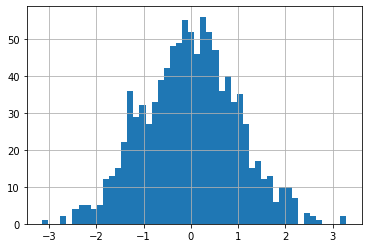

In [23]:
%matplotlib inline

_ = random_data_df.target.hist(bins=50,)

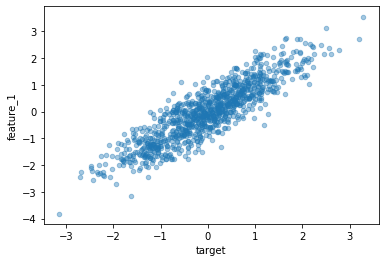

In [24]:
%matplotlib inline

_ = random_data_df.plot(kind="scatter", x="target", y="feature_1", alpha=0.4)

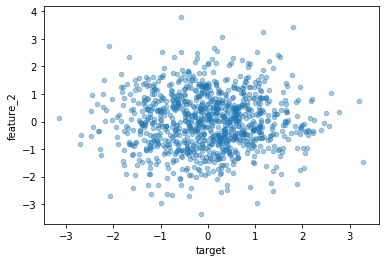

In [25]:
%matplotlib inline

_ = random_data_df.plot(kind="scatter", x="target", y="feature_2", alpha=.4)

In [26]:
from sklearn.model_selection import train_test_split, KFold

FEATURE_COLUMNS = random_data_df.columns[1:]

x_train, x_test, y_train, y_test = train_test_split(random_data_df[FEATURE_COLUMNS], random_data_df["target"])

In [28]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

params = {
    'objective' : 'reg:squarederror',
    #'tree_method':'hist',
    'min_child_weight' : 1,
    'eta' : 0.005,
    'seed' : 0,
    'gamma':0,
    'max_depth': 6,
    'nthread' : 4,
    # 'colsample_bytree': 0.7,
    # 'subsample':0.7,
}

hist = xgb.cv(params, dtrain, nfold=3, as_pandas=True, num_boost_round=2000, verbose_eval=10, early_stopping_rounds=2000, show_stdv=True, seed=0)

## OMG ! Look at that overfitting!

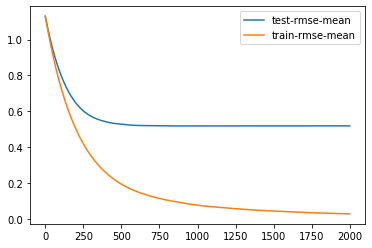

In [29]:
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

In [30]:
## xgboost on training data
bst = xgb.train(params, dtrain, num_boost_round=2000, verbose_eval=100)

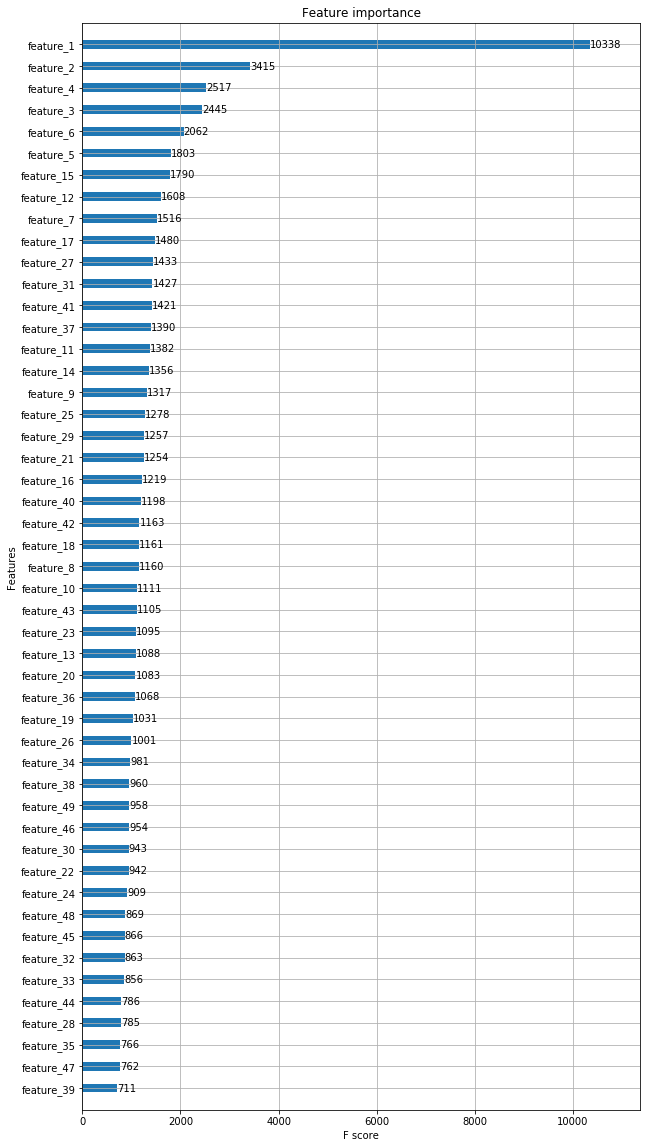

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 20))

xgb.plot_importance(bst, ax=ax, height=0.4)